In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Activation,Dropout,Dense,Flatten,Input,Bidirectional,LSTM,MaxPool2D
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, balanced_accuracy_score, classification_report
import keras
import tensorflow as tf
from keras.layers import Dense, SimpleRNN, LSTM, TimeDistributed, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.show()

In [ ]:
import pandas as pd
df=pd.read_csv('C:\\Users\\anjal\\Desktop\\project-audio-spoofing\\frontend\\M_TRAIN_LA19.csv')
df

In [ ]:
X = df.iloc[:, 0:43].values
y = df.iloc[:,-1].values

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y=y.astype(int)

In [ ]:
X.shape

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X=X.reshape(10242,43,1)

In [10]:
import numpy as np
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
regressor = keras.models.Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (43, 1)))

#regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (67, 1)))

regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

#regressor.fit(X_train, y_train, validation_data= (X_test,y_test),epochs = 50, batch_size = 32)
regressor.fit(X, y, epochs = 50, batch_size = 10)




Epoch 1/50
965/965 [==============================] - 37s 30ms/step - loss: 0.1546 - accuracy: 0.7681
Epoch 2/50
965/965 [==============================] - 33s 34ms/step - loss: 0.0057 - accuracy: 0.9999
Epoch 3/50
965/965 [==============================] - 33s 34ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 4/50
965/965 [==============================] - 34s 35ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 5/50
965/965 [==============================] - 35s 36ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 6/50
965/965 [==============================] - 35s 36ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 7/50
965/965 [==============================] - 37s 38ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/50
965/965 [==============================] - 38s 40ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 9/50
965/965 [==============================] - 38s 39ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/50
965/965 [==============================] - 37s 38ms/step - loss: 0.001

In [37]:
import pandas as pd
dtf=pd.read_csv('C:\\Users\\anjal\\Desktop\\project-audio-spoofing\\frontend\\M_TEST_LA19.csv')
dtf
Xt = dtf.iloc[:, 0:43].values

yt = dtf.iloc[:,-1].values

In [38]:
import numpy as np
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [39]:
# predict_x=regressor.predict(Xt) 

# classes_x=np.argmax(predict_x,axis=1)
prediction1=regressor.predict(Xt)
prediction1=regressor.predict((Xt) > 0.5).astype("int32")

In [40]:
score=regressor.evaluate(Xt, yt)
print("%s: %.2f%%" % (regressor.metrics_names[1], score[1]*100))


171/171 [==============================] - 4s 15ms/step - loss: 3.2958e-04 - accuracy: 0.5463
accuracy: 54.63%


In [44]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

# import numpy as np
# from sklearn.metrics import roc_curve

# results=confusion_matrix(yt, prediction1)
# print("confusion matrix", results)

# accuracy = accuracy_score(yt, prediction1)
# print('Accuracy: %f' % accuracy)

# precision = precision_score(yt, prediction1)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(yt, prediction1)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(yt, prediction1)
# print('F1 score: %f' % f1)

# fpr, tpr, threshold = roc_curve(yt,prediction1, pos_label=1)
# fnr = 1 - tpr
# eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
# EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
# print(eer_threshold)
# print("EER = ", EER)

from sklearn.metrics import accuracy_score
test_acc = accuracy_score(yt, prediction1)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(yt, prediction1))





The Accuracy for Test Set is 9.322344322344323
              precision    recall  f1-score   support

           0       0.09      1.00      0.17       509
           1       0.00      0.00      0.00      2474
           2       0.00      0.00      0.00      2477

    accuracy                           0.09      5460
   macro avg       0.03      0.33      0.06      5460
weighted avg       0.01      0.09      0.02      5460



C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


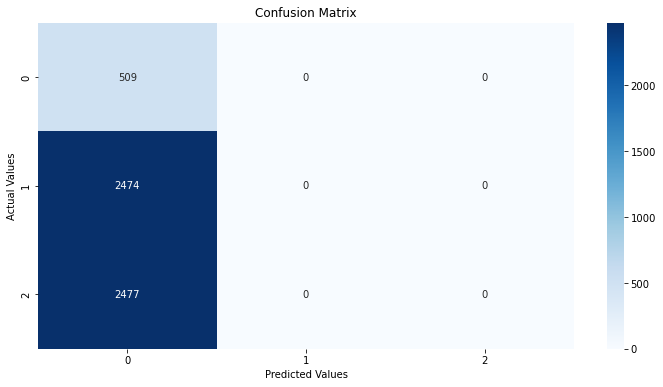

In [49]:
cm=confusion_matrix(yt, prediction1)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(yt, prediction1, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
print(eer_threshold)
print("EER = ", EER)

1
EER =  1.0
